# Handling Missing Values
## Take a first look at the data

In [1]:
import pandas as pd
import numpy as np

In [3]:
nfl_data = pd.read_csv("../Kaggle/data/NFL Play by Play 2009-2017 (v4).csv")

In [4]:
# set seed for reproducibility
np.random.seed(0)

In [5]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## How many missing data points do we have?

Let's see how many missing values we have in each column.

In [13]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum(axis = 0)

In [14]:
missing_values_count[1:10]

GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [15]:
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

In [16]:
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

24.87214126835169


## Figure out why the data is missing

In [22]:
missing_values_count[1:10]

GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

### Drop missing values

In [24]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [26]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis = 1)
columns_with_na_dropped

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,1,0,-4,1,0,0,...,1,BAL,0,3,0,2,0,0.0,0.0,2017
407684,2017-12-31,2017123101,29,4,1,14,-4,1,0,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407685,2017-12-31,2017123101,29,4,1,14,9,1,13,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407686,2017-12-31,2017123101,30,4,1,10,-1,1,-1,0,...,0,None,0,2,0,2,0,0.0,0.0,2017


In [28]:
# how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's droped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's droped: 41


### Filling in missing values automatically

In [29]:
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Pandas's `fillna()` function to fill in missing values in a dataframe fro us. One option we have is to specify what we want the `NaN` values to be replaced with. 

In [31]:
subset_nfl_data.fillna(value = 0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [34]:
# replace all NA's the value that comes directly after it in the same column
# then replace all the remaining na's with 0

subset_nfl_data.fillna(method = "bfill", axis = 0).fillna(value = 0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# Scaling and Normalization

In [16]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# scale
from mlxtend.preprocessing import minmax_scaling

# set seed 
np.random.seed(0)

## Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeable and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

- in **scaling**, you're changing the *range* of your data.  
- in **normalization**, you're changing the *shape of the distribution* of your data.

### Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0 - 100 or 0 - 1. You want to scale data when you're using methods based on measures of how far apart data points are, like **support vector machines (SVM)** or **k-nearest neighbors (KNN)**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

By scaling your variables, you can help compare different variables on equal footing.

Text(0.5, 1.0, 'Scaled data')

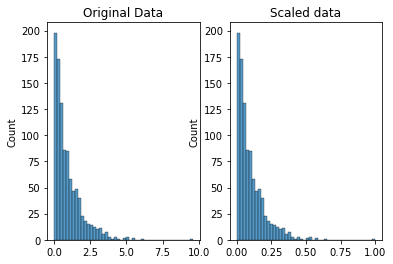

In [27]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax = plt.subplots(1, 2)
sns.histplot(original_data, ax = ax[0], legend = False)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax = ax[1], legend = False)
ax[1].set_title("Scaled data")

### Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

> **Normal distribution**: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you will normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes.  

Text(0.5, 1.0, 'Normalized data')

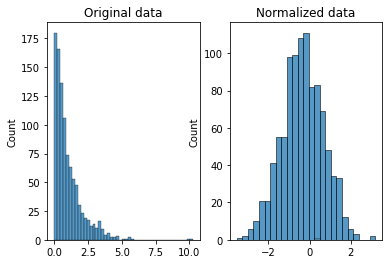

In [26]:
# normalize the expoential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both to compare
fig, ax = plt.subplots(1, 2)
sns.histplot(original_data, ax = ax[0], legend=False)
ax[0].set_title("Original data")

sns.histplot(normalized_data, ax = ax[1], legend=False)
ax[1].set_title("Normalized data")

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks like the outline of a bell.

# Parsing Dates

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("../Kaggle/data/catalog.csv")

# set seed
np.random.seed(0)

## Check the data type of our date column

In [4]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [5]:
print(landslides['date'].head())

# print(landslides.date.head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [6]:
landslides.date.dtype

dtype('O')

### Convert our date columns to datetime

In [7]:
# create a new column
landslides['date_parsed'] = pd.to_datetime(landslides.date, format = "%m/%d/%y")
landslides.date_parsed

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: date_parsed, Length: 1693, dtype: datetime64[ns]

- **What if you run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have pandas try to infer what the right data format should be. 

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format = True)`

- **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

### Select the day of the month

In [11]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides

# landslides['date_parsed'].dt.month
# landslides['date_parsed'].dt.year

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

### Plot the day of the month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The `to_datetime()` functions does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

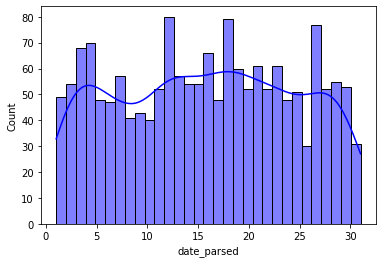

In [12]:
sns.histplot(day_of_month_landslides, 
             bins = 31, 
             kde =True, 
            color = "blue", 
            legend = True)

# Character Encodings

In [13]:
# modules we'll use
import pandas as pd
import numpy as np

# character encoding module
import chardet

# set seed
np.random.seed(0)

## What are encodings?

**Character encodings** are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you need up with scrambled text called "mojibake".

Character encoding mismatches are less common today than they used tobe, but it's definitely still a problem. There are lots of different character encodings, but main one you need to known is UTF-8.  

> UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

There are two main data types you'll encounter when working with text in Python3.  

- `string`, which is what text is by default.  
- `bytes`, which is a sequence of integers.

In [14]:
before = "this is the euro symbol: ￥"
type(before)

str

In [15]:
after = before.encode(encoding = "UTF-8", errors = "replace")

type(after)

bytes

In [16]:
print(after)

b'this is the euro symbol: \xef\xbf\xa5'


In [17]:
print(after.decode(encoding = "utf-8"))

this is the euro symbol: ￥


# Inconsistent Data Entry

In [20]:
# modules we'll use 
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# read in all our data
professors = pd.read_csv("../Kaggle/data/pakistan_intellectual_capital.csv")

# set seed
np.random.seed(0)

## Do some prelimilary text pre-processing

In [21]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [28]:
# get all the unique values in the 'Country' column
countries = professors["Country"].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [30]:
# convert to lower case
professors["Country"] = professors["Country"].str.lower()

# remove trailing white space
professors['Country'] = professors["Country"].str.strip()

## Use fuzzy matching to correct inconsistent data entry

In [34]:
countries = professors["Country"].unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

we going to use the `fuzzywuzzy` package to help identify which strings are closest to each other. 

> **Fuzzy matching**: The process of automatically finding text strings that are similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So, "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (replace "i" with "o"). You won't always be able to relay on fuzzy matching 100%, but it will usually end up saving you at least a little time. 

`Fuzzywuzzy` returns a ratio given two strings. The closer the ration is to 100, the smaller the edit distance between the two strings. 

In [36]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract(query = "south korea", 
                                     choices = countries, 
                                     limit=10, 
                                     scorer = fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

Replace all rows in our "Country" column that have a ratio of > 47 with "south korea".

In [40]:
# function to replace rows in the provided column of the provided dataframe 
# that match the provided string above the provided ratioo with the provided string

def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(query = string_to_match, 
                                        choices = strings, 
                                        limit = 10, 
                                        scorer = fuzzywuzzy.fuzz.token_sort_ratio)
    
    # only get matches with a ratio > 47
    close_matches = [matches[0] for matches in matches if matches[1] > min_ratio]
    
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the functions's done
    print("All done!")

In [41]:
replace_matches_in_column(df = professors, 
                         column = "Country", 
                         string_to_match = "sount korea")

All done!


In [45]:
countries = professors["Country"].unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'sount korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)